In [1]:
#Data Analysis libraries
import pandas as pd
import numpy as np

In [2]:
#Data Visuzlization libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
df['Avg. Area House Age'] = 60 - df['Avg. Area House Age']
df['Avg. Area House Age']

0       54.317139
1       53.997100
2       54.134110
3       52.811764
4       54.959445
          ...    
4995    52.169638
4996    53.000865
4997    52.749409
4998    54.465612
4999    54.007695
Name: Avg. Area House Age, Length: 5000, dtype: float64

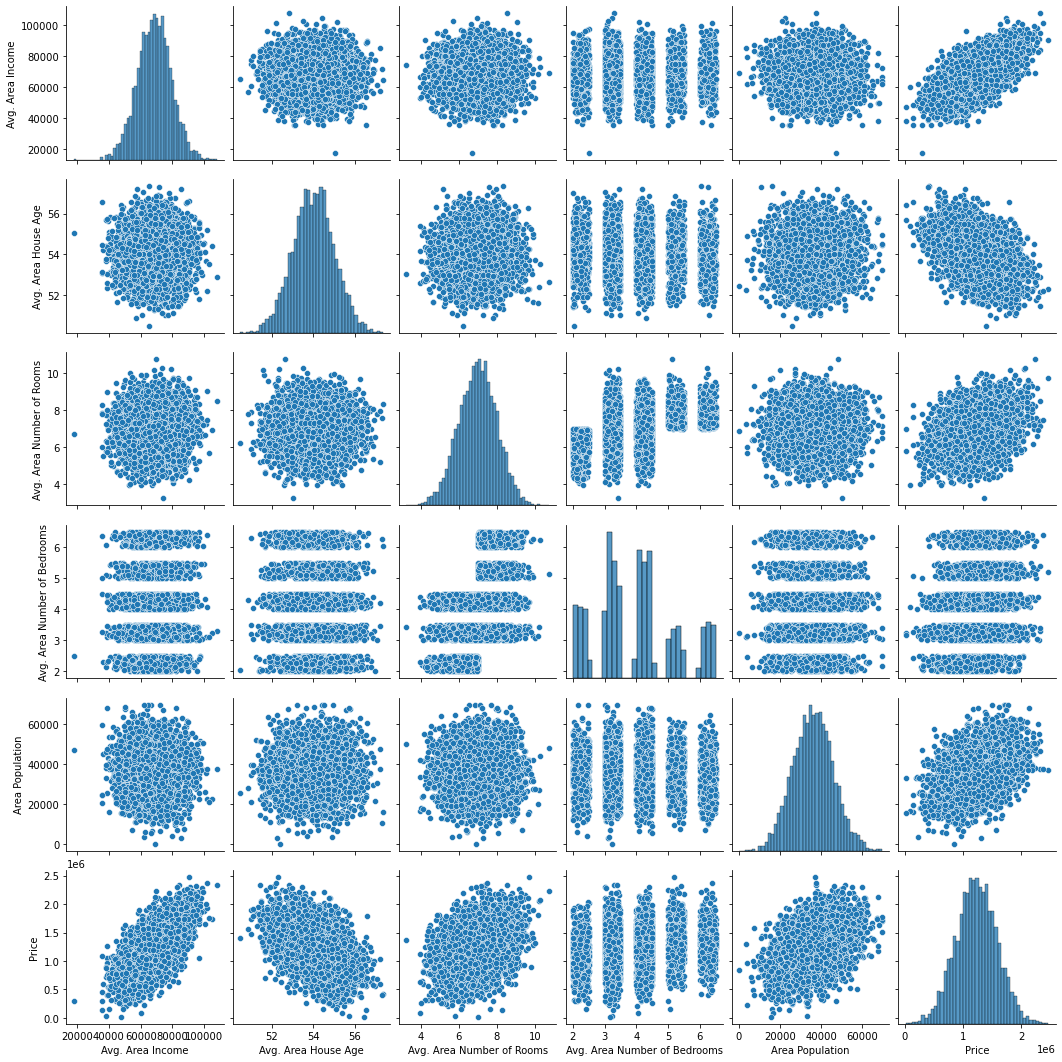

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price', ylabel='Count'>

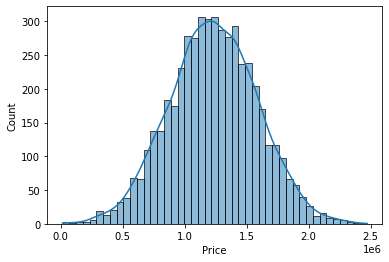

In [10]:
sns.histplot(df['Price'], kde=True)

In [11]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,0.002007,1.000000,0.009428,-0.006149,0.018743,-0.452543
Avg. Area Number of Rooms,-0.011032,0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,-0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,-0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

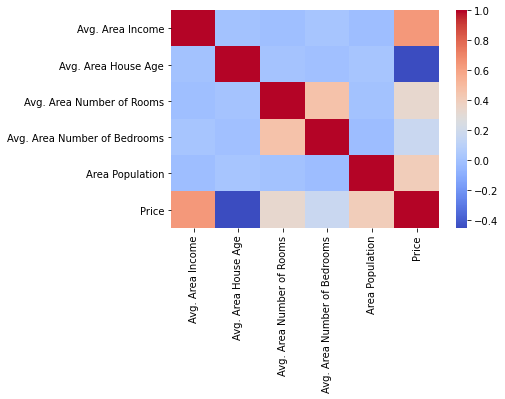

In [12]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [13]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
        'Area Population']]

In [14]:
y = df['Price']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
lm.intercept_

7252837.124762757

In [21]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])

In [22]:
coeff_df

,Coefficients
Avg. Area Income,21.528276
Avg. Area House Age,-164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Linear regression – 2

In [23]:
predictions = lm.predict(X_test)

In [24]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

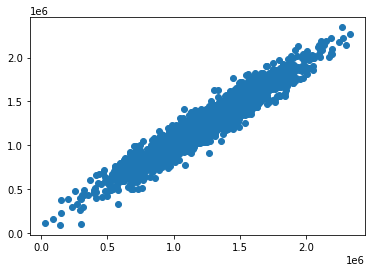

In [25]:
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='Price', ylabel='Count'>

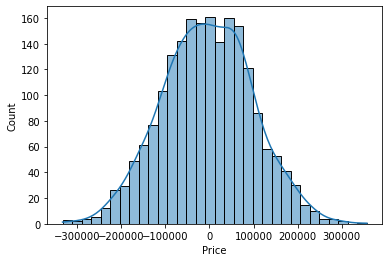

In [26]:
sns.histplot(y_test-predictions, kde=True)

In [27]:
from sklearn import metrics

In [28]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914954

In [29]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209503

In [30]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153

Transformed average house age to expected remaining building lifetime assuming building life time of 60 but didn't change the column heading.

explore the address column

['a', 'b', 'c']